In [1]:
import os, sys, glob
import math
import numpy as np
import pandas as pd
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Results4/all.csv")

In [3]:
df.head()

,Unnamed: 0,Type,Sample_Id,Hugo_Symbol,Entrez_Gene_Id,Chromosome,Loc,Tid,NC,AAC,...,C1,C2,RNA,Rank_A1,Rank_A2,Rank_B1,Rank_B2,Rank_C1,Rank_C2,Rank
0,4,ACC,TCGA-OR-A5JM-01,HRNR,388697,1,152188235,NM_001009931,c.G5870A,p.G1957D,...,C*07:02,C*04:01,1.7241,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000
1,6,ACC,TCGA-OR-A5JM-01,PEAR1,375033,1,156878718,NM_001080471,c.G1301A,p.C434Y,...,C*07:02,C*04:01,36.2069,4.000000,4.000000,4.0,1.728875,4.000000,4.000000,3.281538
2,9,ACC,TCGA-OR-A5JM-01,RASSF5,83593,1,206730911,NM_182665,c.G10T,p.D4Y,...,C*07:02,C*04:01,569.8276,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000
3,24,ACC,TCGA-OR-A5JM-01,OR51F1,256892,11,4790948,NM_001004752,c.G200T,p.R67M,...,C*07:02,C*04:01,0.0000,0.871125,0.871125,4.0,4.000000,4.000000,4.000000,1.820454
4,25,ACC,TCGA-OR-A5JM-01,OR51F1,256892,11,4790951,NM_001004752,c.T197C,p.F66S,...,C*07:02,C*04:01,0.0000,4.000000,4.000000,4.0,4.000000,1.319625,2.344875,2.746935


In [4]:
df.columns

Index(['Unnamed: 0', 'Type', 'Sample_Id', 'Hugo_Symbol', 'Entrez_Gene_Id',
       'Chromosome', 'Loc', 'Tid', 'NC', 'AAC', 'cn-gl', 'VAF', 'CCF', 'A1',
       'A2', 'B1', 'B2', 'C1', 'C2', 'RNA', 'Rank_A1', 'Rank_A2', 'Rank_B1',
       'Rank_B2', 'Rank_C1', 'Rank_C2', 'Rank'],
      dtype='object')

In [28]:
df["CCF-CAT"] = df["CCF"].apply(lambda x : "high" if x >= 0.3 else "low")
df["Rank-CAT"] = df["Rank"].apply(lambda x : "high" if x <= 2 else "low")
df["Rank-Truncated"] = df["Rank"].apply(lambda x : 4 if x >= 4 else x)

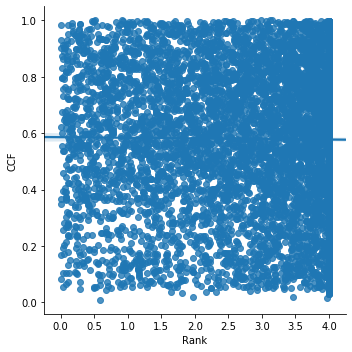

In [38]:
df0 = df[ (df["RNA"]>100) &
    (df["Rank"]>0) &(np.abs(df["cn-gl"]) <= 0.3) &
        (df["Rank_C2"]>=0) & (df["Rank_C1"]>=0) & 
          (df["Rank_B2"]>=0) & (df["Rank_B1"]>=0) &
          (df["Rank_A2"]>=0) & (df["Rank_A1"]>=0)]
fig = sns.lmplot(data=df0,x="Rank",y="CCF")
fig.savefig("BestRank_RNA.png",dpi=1200)

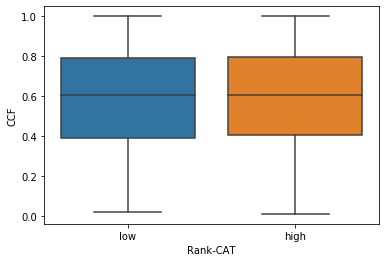

In [39]:
g = sns.boxplot(data=df[(df["RNA"]>100) & (np.abs(df["cn-gl"]) <= 0.3) & 
          (df["Rank_C2"]>=0) & (df["Rank_C1"]>=0) & 
          (df["Rank_B2"]>=0) & (df["Rank_B1"]>=0) &
          (df["Rank_A2"]>=0) & (df["Rank_A1"]>=0)], x="Rank-CAT", y="CCF", order=["low", "high"],)
#                 hue="Rank-CAT", hue_order=["low", "high"])
# sns.stripplot(data=df[(df["RNA"]>10) & (np.abs(df["cn-gl"]) <= 0.3) & 
#           (df["Rank_C2"]>=0) & (df["Rank_C1"]>=0) & 
#           (df["Rank_B2"]>=0) & (df["Rank_B1"]>=0) &
#           (df["Rank_A2"]>=0) & (df["Rank_A1"]>=0)], x="Rank-CAT", y="CCF", order=["low", "high"],)
# g.set_ylim((0,5))

plt.savefig("BoxRank_RNA.png",dpi=1200)

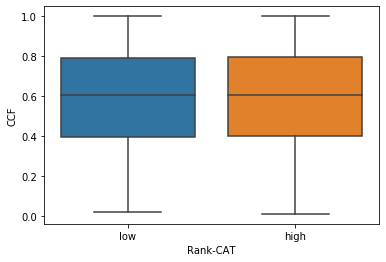

In [13]:
g = sns.boxplot(data=df[(df["RNA"]>10) & (np.abs(df["cn-gl"]) <= 0.3) & 
          (df["Rank_C2"]>=0) & (df["Rank_C1"]>=0) & 
          (df["Rank_B2"]>=0) & (df["Rank_B1"]>=0) &
          (df["Rank_A2"]>=0) & (df["Rank_A1"]>=0)], x="Rank-CAT", y="CCF", order=["low", "high"],)

In [14]:
df2 = df[(df["RNA"]>10) & (np.abs(df["cn-gl"]) <= 0.3) & 
          (df["Rank_C2"]>=0) & (df["Rank_C1"]>=0) & 
          (df["Rank_B2"]>=0) & (df["Rank_B1"]>=0) &
          (df["Rank_A2"]>=0) & (df["Rank_A1"]>=0)]

In [15]:
df2.groupby(["CCF-CAT", "Rank-CAT"]).count()

Unnamed: 0  Type  Sample_Id  Hugo_Symbol  Entrez_Gene_Id  \
CCF-CAT Rank-CAT                                                             
high    high            2151  2151       2151         2151            2151   
        low             8402  8402       8402         8402            8402   
low     high             401   401        401          401             401   
        low             1651  1651       1651         1651            1651   

                  Chromosome   Loc   Tid    NC   AAC  ...    C2   RNA  \
CCF-CAT Rank-CAT                                      ...               
high    high            2151  2151  2151  2151  2151  ...  2151  2151   
        low             8402  8402  8402  8402  8402  ...  8402  8402   
low     high             401   401   401   401   401  ...   401   401   
        low             1651  1651  1651  1651  1651  ...  1651  1651   

                  Rank_A1  Rank_A2  Rank_B1  Rank_B2  Rank_C1  Rank_C2  Rank  \
CCF-CAT Rank-CAT                                                               
high    high         2151     2151     2151     2151     2151     2151  2151   
        low          8402     8402     8402     8402     8402     8402  8402   
low     high          401      401      401      401      401      401   401   
        low          1651     1651     1651     1651     1651     1651  1651   

                  Rank-Truncated  
CCF-CAT Rank-CAT                  
high    high                2151  
        low                 8402  
low     high                 401  
        low                 1651  

[4 rows x 28 columns]

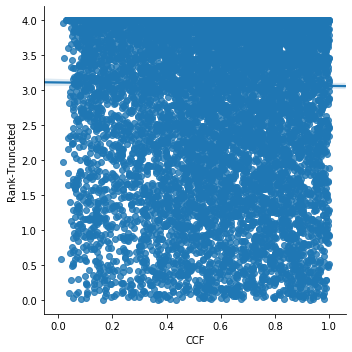

In [16]:
sns.lmplot(data=df2[(df2["RNA"]>10) & (np.abs(df2["cn-gl"]) <= 0.3) & 
        (df2["Rank_C2"]>=0) & (df2["Rank_C1"]>=0) & 
        (df2["Rank_B2"]>=0) & (df2["Rank_B1"]>=0) &
        (df2["Rank_A2"]>=0) & (df2["Rank_A1"]>=0)
       ], x="CCF", y="Rank-Truncated")
# plt.gca().set_ylim((0,4))

(0, 40)

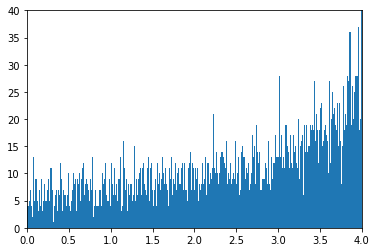

In [20]:
plt.hist(df2[(df2["RNA"]>100) & (np.abs(df2["cn-gl"]) <= 0.3) & 
        (df2["Rank_C2"]>=0) & (df2["Rank_C1"]>=0) & 
        (df2["Rank_B2"]>=0) & (df2["Rank_B1"]>=0) &
        (df2["Rank_A2"]>=0) & (df2["Rank_A1"]>=0)
       ]["Rank"], bins=500)
print()
plt.gca().set_xlim((0,4))
plt.gca().set_ylim((0,40))

In [21]:
for t in [1,10,50,100,1000]:
    print(t, ":", len(df2[df2["RNA"]>t]))

1 : 12605
10 : 12605
50 : 10567
100 : 9498
1000 : 3257


In [22]:
len(df2)

12605

In [23]:
len(df)

145369

In [24]:
len(df2[(df2["RNA"]>1000) & (np.abs(df2["cn-gl"]) <= 0.05) & 
        (df2["Rank_C2"]>=0) & (df2["Rank_C1"]>=0) & 
        (df2["Rank_B2"]>=0) & (df2["Rank_B1"]>=0) &
        (df2["Rank_A2"]>=0) & (df2["Rank_A1"]>=0)
       ])

1232

In [25]:
df2["Rank_C2"]

1         4.000000
6         2.850000
8         4.000000
11        4.000000
13        4.000000
17        4.000000
18        4.000000
22        4.000000
23        4.000000
24        4.000000
25        4.000000
321       1.877750
324       4.000000
326       0.402125
327       4.000000
329       4.000000
332       4.000000
334       3.822500
338       4.000000
345       0.020875
349       4.000000
350       4.000000
352       4.000000
355       4.000000
356       2.657125
358       4.000000
360       0.618625
363       4.000000
367       4.000000
368       4.000000
            ...   
144622    2.237625
144624    4.000000
144626    4.000000
144628    4.000000
144631    4.000000
144637    2.915125
144639    4.000000
144642    1.748500
144645    2.325375
144649    4.000000
144652    4.000000
144657    4.000000
144671    4.000000
144672    0.017625
144674    4.000000
144675    4.000000
144677    4.000000
144678    4.000000
144686    1.993000
144687    4.000000
144690    4.000000
144692    1.